<a href="https://colab.research.google.com/github/MHHamdan/.github/blob/main/DSD_VectorEmbeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vector Embeddings for Semantic Search
A pragmatic guide for building vector-powered apps.

The plan for today:
1. Look at pretty pictures
1. Math primer
1. Let's put vectors to work
1. How to build a system around vectors



# 1. Look at pretty pictures

[Tweet visualization by Nomic](https://atlas.nomic.ai/map/twitter)

# 2. Math primer

### Vectors & addition

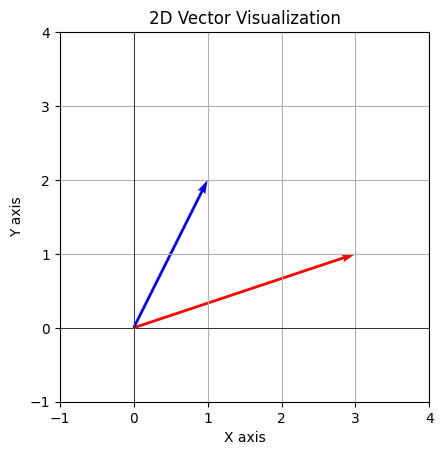

In [1]:
# What is a vector?
import numpy as np
import matplotlib.pyplot as plt

# Define two vectors in 2D
vector_a = np.array([3, 1])
vector_b = np.array([1, 2])

# Plotting the vectors
plt.figure()
plt.quiver(0, 0, vector_a[0], vector_a[1], angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver(0, 0, vector_b[0], vector_b[1], angles='xy', scale_units='xy', scale=1, color='b')
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.grid()
plt.title('2D Vector Visualization')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


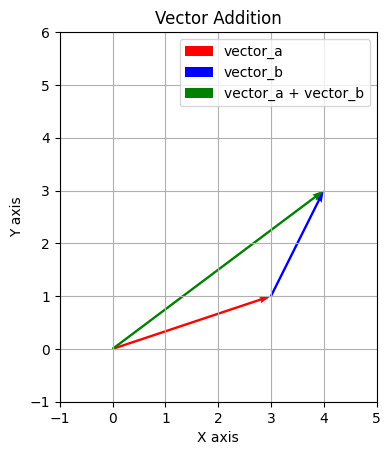

In [2]:
# Vector addition
# Vector Addition
vector_c = vector_a + vector_b

# Plotting
plt.figure()
plt.quiver(0, 0, vector_a[0], vector_a[1], angles='xy', scale_units='xy', scale=1, color='r', label='vector_a')
plt.quiver(vector_a[0], vector_a[1], vector_b[0], vector_b[1], angles='xy', scale_units='xy', scale=1, color='b', label='vector_b')
plt.quiver(0, 0, vector_c[0], vector_c[1], angles='xy', scale_units='xy', scale=1, color='g', label='vector_a + vector_b')
plt.xlim(-1, 5)
plt.ylim(-1, 6)
plt.grid()
plt.title('Vector Addition')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


### Dot product

In [3]:
# Calculating dot product
dot_product = np.dot(vector_a, vector_b)

# Display the result
print("Dot Product:", dot_product)


Dot Product: 5


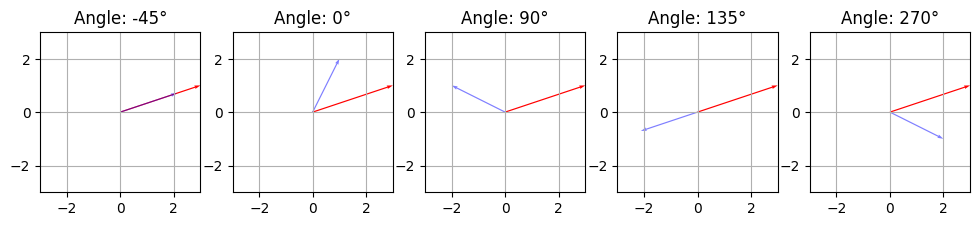

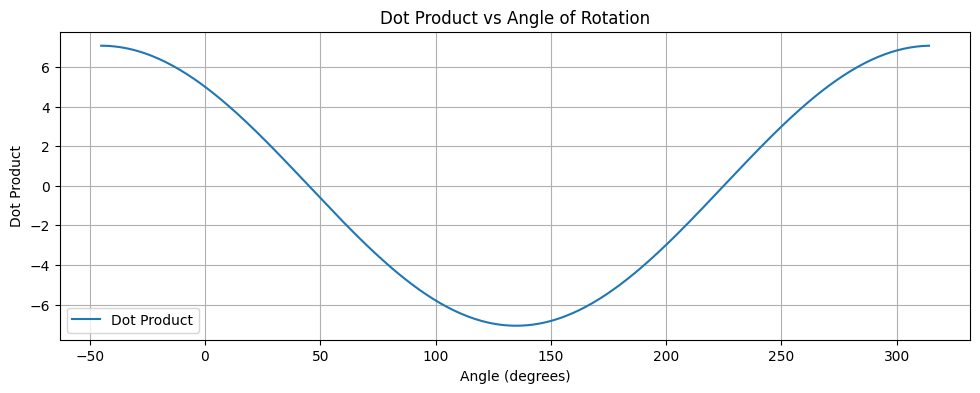

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def rotate_vector(vector, angle):
    """Rotate a vector by a given angle in degrees."""
    rad = np.radians(angle)
    rotation_matrix = np.array([[np.cos(rad), -np.sin(rad)],
                                [np.sin(rad), np.cos(rad)]])
    return np.dot(rotation_matrix, vector)

# Fixed vector
#vector_a = np.array([2, 3])

# Angle range and interval for visualization
angles = [-45, 0, 90, 180-45, 270] #np.arange(0, 360, 90)

# Create subplots
fig, axs = plt.subplots(1, len(angles), figsize=(12, 3))

for i, angle in enumerate(angles):
    rotated_vector_b = rotate_vector(vector_b, angle)

    # Plot vectors
    axs[i].quiver(0, 0, vector_a[0], vector_a[1], angles='xy', scale_units='xy', scale=1, color='r')
    axs[i].quiver(0, 0, rotated_vector_b[0], rotated_vector_b[1], angles='xy', scale_units='xy', scale=1, color='b', alpha=0.5)
    axs[i].set_xlim(-3, 3)
    axs[i].set_ylim(-3, 3)
    axs[i].grid()
    axs[i].set_title(f'Angle: {angle}°')
    axs[i].set_aspect('equal', adjustable='box')

angles = np.arange(-45, 360-45, 1)
dot_products = []

for angle in angles:
    rotated_vector_b = rotate_vector(vector_b, angle)
    dot_product = np.dot(vector_a, rotated_vector_b)
    dot_products.append(dot_product)

# Plotting the change in dot product
plt.figure(figsize=(11.75, 4))
plt.plot(angles, dot_products, label='Dot Product')
plt.xlabel('Angle (degrees)')
plt.ylabel('Dot Product')
plt.title('Dot Product vs Angle of Rotation')
plt.grid(True)
plt.legend()
plt.show()

plt.tight_layout()
plt.show()


### Cosine similarity

In [5]:
# Cosine similarity
cos_sim = np.dot(vector_a, vector_b) / (np.linalg.norm(vector_a) * np.linalg.norm(vector_b))

# Display the result
print("Cosine Similarity:", cos_sim)

Cosine Similarity: 0.7071067811865475


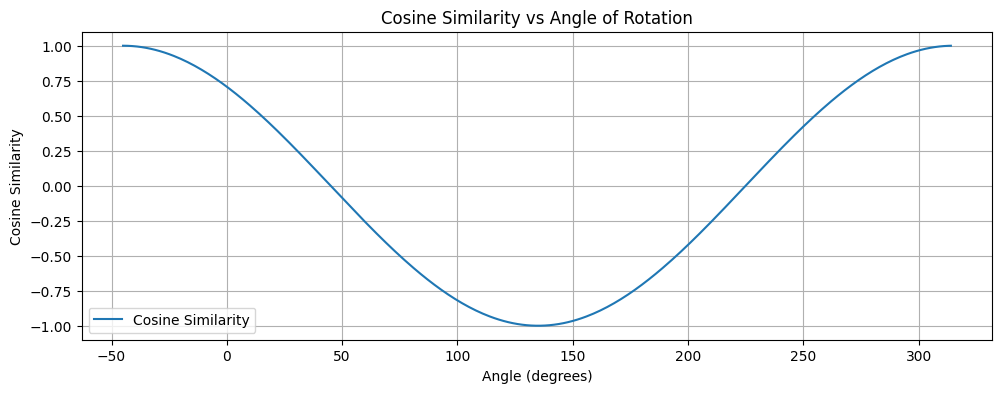

<Figure size 640x480 with 0 Axes>

In [6]:
angles = np.arange(-45, 360-45, 1)
cosine_sims = []

for angle in angles:
    rotated_vector_b = rotate_vector(vector_b, angle)
    cosine_sim = np.dot(vector_a, rotated_vector_b) / (np.linalg.norm(vector_a) * np.linalg.norm(rotated_vector_b))
    cosine_sims.append(cosine_sim)

# Plotting the change in cosine similarity
plt.figure(figsize=(11.75, 4))
plt.plot(angles, cosine_sims, label='Cosine Similarity')
plt.xlabel('Angle (degrees)')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity vs Angle of Rotation')
plt.grid(True)
plt.legend()
plt.show()

plt.tight_layout()
plt.show()

# 3. Let's put the vectors to work

### Sentence transformers example

In [7]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 1.7 MB/s eta 0:00:00


In [8]:
#
#MODEL = "sentence-transformers/paraphrase-MiniLM-L3-v2" #

from sentence_transformers import SentenceTransformer
model = SentenceTransformer("paraphrase-MiniLM-L3-v2")

# Our sentences to encode
sentences = [
    "dog",
    "cat",
    "horse",
    "pony",
    "ship",
    "bus",
    "car"
]

# Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
embeddings.shape

(7, 384)

In [11]:
embeddings

array([[-0.19231653, -0.09167858,  0.46764907, ..., -0.5383188 ,
         0.618563  ,  0.55916077],
       [-0.2415299 , -0.7658644 ,  0.35368356, ..., -0.35912982,
         0.57061726, -0.36685935],
       [-0.19930755,  0.05670579,  0.51831234, ..., -0.02072063,
         0.26669922, -0.2957857 ],
       ...,
       [ 0.05810054,  0.32081798,  0.03779997, ..., -0.3789998 ,
         0.7282889 ,  0.07179119],
       [ 0.68144935, -0.6004489 , -0.07603562, ...,  0.4715767 ,
        -0.13269539,  0.04093894],
       [-0.04668522, -0.17736061,  0.13833354, ...,  0.14503776,
         0.3539467 , -0.06584007]], dtype=float32)

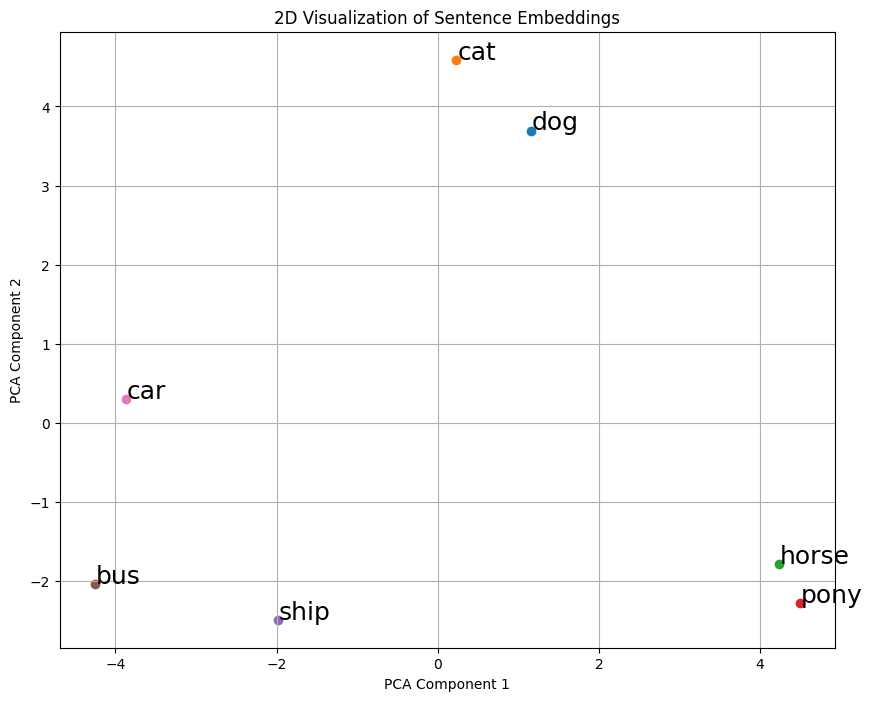

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the dimensions of the embeddings to 2
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plotting
plt.figure(figsize=(10, 8))
for i, (embedding, sentence) in enumerate(zip(embeddings_2d, sentences)):
    x, y = embedding
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, sentence, fontsize=18)

plt.title("2D Visualization of Sentence Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


### Real-data example

In [13]:
# Load and prepare data.
DATASET_URL = "https://storage.googleapis.com/superlinked-notebook-netflix-shows-dataset/titles.csv"
import pandas as pd
movie_df = pd.read_csv(DATASET_URL)
movie_df = movie_df[["description", "genres", "title", "release_year"]].drop_duplicates(subset=["description"]).dropna(how='any')
movie_df['id'] = movie_df["description"].map(hash)
movie_df["genres"] = movie_df["genres"].apply(lambda x: " ".join(eval(x)))
movie_df["timestamp"] = [pd.Timestamp(year=year, month=1, day=1).timestamp() for year in movie_df["release_year"].tolist()]
print("Movie count:",movie_df.shape[0])
movie_df.head()

Movie count: 5829


,description,genres,title,release_year,id,timestamp
0,This collection includes 12 World War II-era p...,documentation,Five Came Back: The Reference Films,1945,601158252982063637,-788918400.0
1,A mentally unstable Vietnam War veteran works ...,drama crime,Taxi Driver,1976,-3502409680074501610,189302400.0
2,Intent on seeing the Cahulawassee River before...,drama action thriller european,Deliverance,1972,8766342238378318145,63072000.0
3,"King Arthur, accompanied by his squire, recrui...",fantasy action comedy,Monty Python and the Holy Grail,1975,142576506740329253,157766400.0
4,12 American military prisoners in World War II...,war action,The Dirty Dozen,1967,106204962175441759,-94694400.0


In [14]:
movie_df = movie_df[movie_df["release_year"] == 2022]

In [15]:
# Generate embeddings for each description
embeddings = model.encode(movie_df['description'].tolist())

# Add the embeddings as a new column to the DataFrame
movie_df['description_embedding'] = list(embeddings)

In [16]:
movie_df.head()

,description,genres,title,release_year,id,timestamp,description_embedding
4692,When a shadowy CIA agent uncovers damning agen...,thriller action,The Gray Man,2022,7910778837594807173,1.640995e+09,"[-0.13682248, -0.22543417, 0.17678411, -0.2825..."
4693,Nearly three decades after the discovery of th...,scifi thriller action horror,Resident Evil,2022,-5753650028197046916,1.640995e+09,"[-0.0166055, -0.18116552, -0.056171242, -0.219..."
4694,A fictional history of two legendary revolutio...,drama action,RRR,2022,5414251134893423195,1.640995e+09,"[-0.083046034, 0.04704028, -0.07684862, 0.1081..."
4696,"In a case of mistaken identity, the world’s de...",action thriller drama romance comedy,The Man from Toronto,2022,9116035522615979125,1.640995e+09,"[0.033186372, 0.022560844, -0.19066976, -0.320..."
4697,Living with her snobby family on the brink of ...,romance drama comedy,Persuasion,2022,5848655473331091149,1.640995e+09,"[0.23396167, -0.22996369, 0.16498272, -0.13337..."


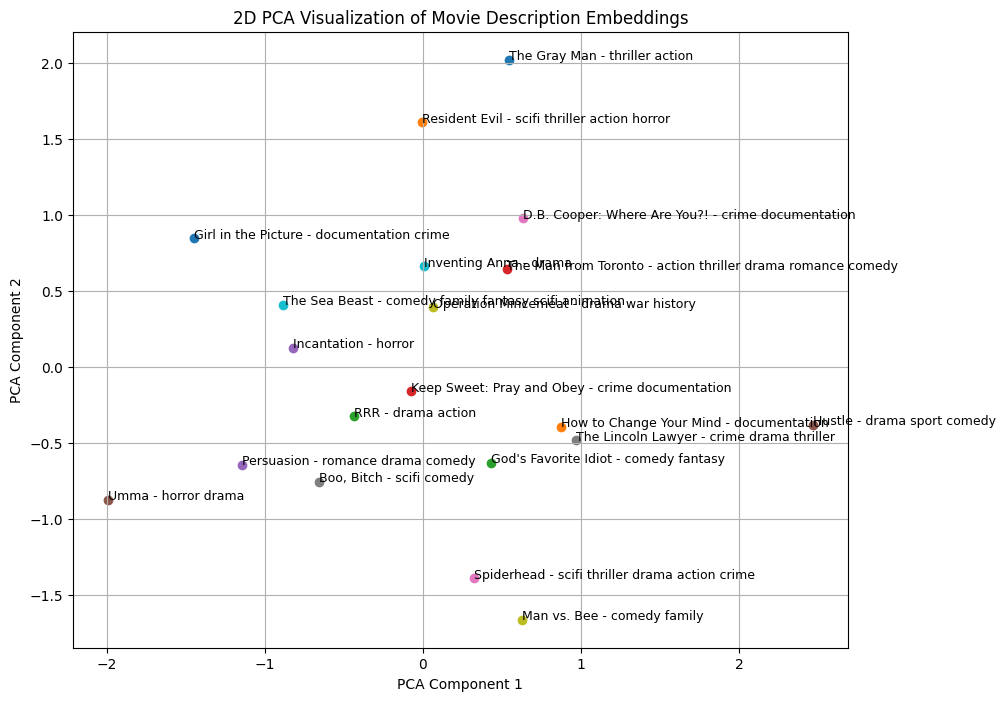

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming df is your DataFrame and it contains 'description_embedding' and 'title' columns

# Select the first 10 movies
movies_to_visualize = movie_df.head(20)

# Extract embeddings and titles
embeddings = list(movies_to_visualize['description_embedding'])
titles = list(movies_to_visualize['title']+" - "+movies_to_visualize['genres'])

# Reduce the dimensions of the embeddings to 2D using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plotting
plt.figure(figsize=(10, 8))
for i, (embedding, title) in enumerate(zip(embeddings_2d, titles)):
    x, y = embedding
    plt.scatter(x, y)
    plt.text(x, y, title, fontsize=9)

plt.title("2D PCA Visualization of Movie Description Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [18]:
# Generate embeddings for each description
embeddings = model.encode(movie_df['genres'].tolist())

# Add the embeddings as a new column to the DataFrame
movie_df['genres_embedding'] = list(embeddings)

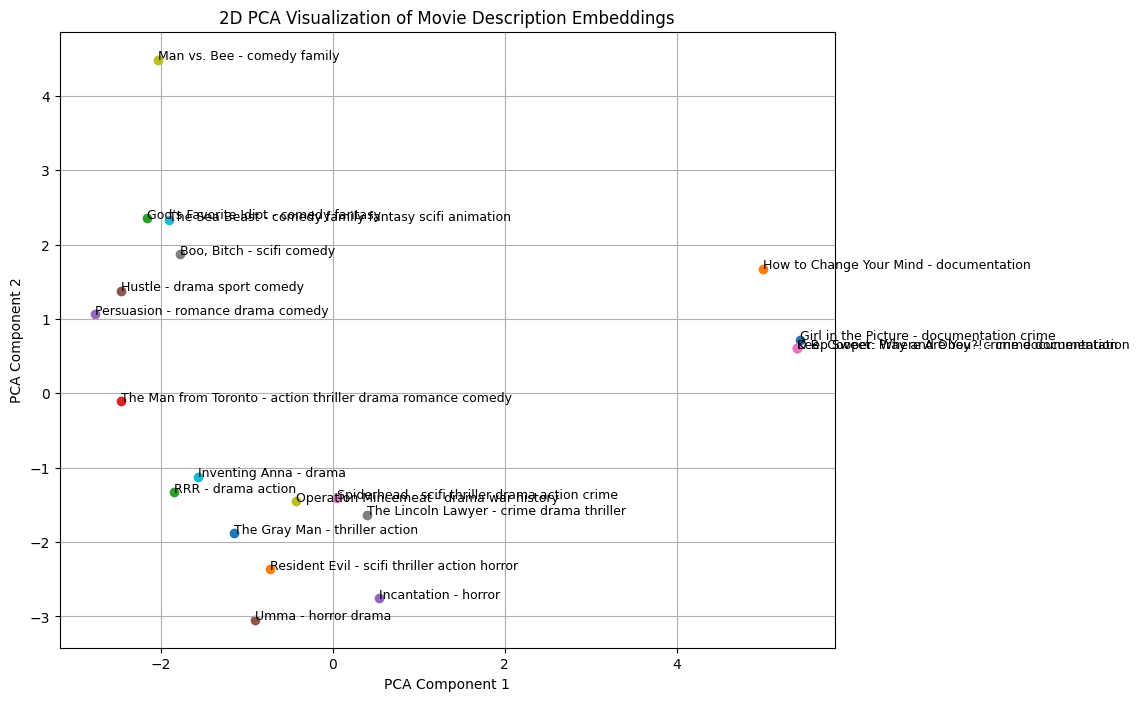

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming df is your DataFrame and it contains 'description_embedding' and 'title' columns

# Select the first 10 movies
movies_to_visualize = movie_df.head(20)

# Extract embeddings and titles
embeddings = list(movies_to_visualize['genres_embedding'])
titles = list(movies_to_visualize['title']+" - "+movies_to_visualize['genres'])

# Reduce the dimensions of the embeddings to 2D using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plotting
plt.figure(figsize=(10, 8))
for i, (embedding, title) in enumerate(zip(embeddings_2d, titles)):
    x, y = embedding
    plt.scatter(x, y)
    plt.text(x, y, title, fontsize=9)

plt.title("2D PCA Visualization of Movie Description Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


### Building simple search

In [20]:
from scipy.spatial.distance import cosine
import pandas as pd

def find_top_n_matches(query, df, embedding_field, n=5):
    """
    Find the top N matches in df for the given query.

    :param query: The search query string.
    :param df: The DataFrame with a 'description_embedding' column.
    :param n: Number of top matches to return.
    :return: A DataFrame with the top N matches.
    """
    # Calculate the embedding for the query
    query_embedding = model.encode([query])[0]

    # Calculate cosine similarity with all descriptions
    df['similarity'] = df[embedding_field].apply(lambda emb: 1 - cosine(query_embedding, emb))

    # Sort by similarity
    top_n = df.sort_values(by='similarity', ascending=False).head(n)

    # Drop the similarity column for the final output
    return top_n.drop(columns=['similarity'])

# Example usage
search_query = "educational documentaries" # Scary, happy, cheerful, educational, documentary
find_top_n_matches(search_query, movie_df, 'genres_embedding', n=7) # genres_embedding, description_embedding

,description,genres,title,release_year,id,timestamp,description_embedding,genres_embedding
5209,The story of Dirty Lines starts in 1987's Amst...,drama history,Dirty Lines,2022,-7823911286609686075,1.640995e+09,"[-0.0147535335, 0.10356215, -0.04445351, -0.03...","[-0.007104909, 0.15992478, 0.05816071, -0.0187..."
5235,Resourceful young Hugo Llor works to make a na...,drama history comedy scifi,Heirs to the Land,2022,-5497282867485962392,1.640995e+09,"[-0.042929053, 0.010106311, 0.109190285, -0.08...","[-0.21304409, -0.11317865, 0.2553019, -0.13449..."
5073,Romance is sweet and bitter — and life riddled...,drama,Our Blues,2022,3909884875379920124,1.640995e+09,"[0.09204137, 0.014302196, 0.33884603, 0.003784...","[0.11855797, -0.28120142, 0.3112477, -0.137762..."
4735,"After a decades-long absence, a renowned Paris...",drama,Queen,2022,44515468241332165,1.640995e+09,"[-0.11210663, 0.1625242, 0.092513196, -0.29090...","[0.11855797, -0.28120142, 0.3112477, -0.137762..."
5549,"When India's most famous actress goes missing,...",drama,The Fame Game,2022,3620202744170994255,1.640995e+09,"[0.12147665, -0.219653, 0.17959478, -0.1207344...","[0.11855797, -0.28120142, 0.3112477, -0.137762..."
4910,"Through an exclusive matchmaking agency, women...",drama,Remarriage & Desires,2022,1677120451044246742,1.640995e+09,"[0.24647349, 0.11674815, -0.036728658, -0.3249...","[0.11855797, -0.28120142, 0.3112477, -0.137762..."
4723,Brilliant attorney Woo Young-woo tackles chall...,drama,Extraordinary Attorney Woo,2022,-8060530556839663790,1.640995e+09,"[0.071270026, 0.09604465, 0.37343886, -0.08487...","[0.11855797, -0.28120142, 0.3112477, -0.137762..."


In [21]:
# Generate embeddings for each description
embeddings = model.encode((movie_df['genres']+", "+movie_df['description']).tolist()) # Embedding trick!

# Add the embeddings as a new column to the DataFrame
movie_df['compound_embedding'] = list(embeddings)

In [22]:
search_query = "educational documentaries" # Scary, happy, cheerful, educational, documentary
find_top_n_matches(search_query, movie_df, 'compound_embedding', n=7) # genres_embedding, description_embedding

,description,genres,title,release_year,id,timestamp,description_embedding,genres_embedding,compound_embedding
4858,All the cool kids were wearing it. This docume...,documentation,White Hot: The Rise & Fall of Abercrombie & Fitch,2022,-3237682303642761680,1.640995e+09,"[0.119765155, -0.14561455, 0.2984742, 0.083094...","[-0.6443005, -0.059367444, -0.0032699406, 0.34...","[0.036256507, -0.09593629, 0.2520864, 0.121601..."
4706,"In interviews and rare home video footage, ex-...",crime documentation,Keep Sweet: Pray and Obey,2022,9164496322956866470,1.640995e+09,"[0.062492188, -0.09940419, 0.17588967, -0.2258...","[-0.18799955, 0.14667563, -0.24448714, -0.0023...","[0.017720804, -0.014401722, 0.058170754, -0.21..."
5458,The heroic kids of the Action Academy take on ...,family action animation fantasy scifi comedy,Action Pack,2022,7892880326970615412,1.640995e+09,"[-0.0037215992, -0.023053572, 0.1118711, 0.059...","[-0.1424399, -0.7222411, 0.6198518, -0.2912377...","[-0.03142868, -0.308693, 0.27864355, 0.0153841..."
5595,Filmed at the Walker Theatre in his hometown o...,comedy documentation,Mike Epps: Indiana Mike,2022,8275944398996767963,1.640995e+09,"[0.06068055, -0.10480068, 0.15262994, -0.09326...","[-0.4897904, -0.20624453, 0.30918857, -0.55433...","[-0.032943334, -0.10243884, 0.14616373, -0.111..."
5302,Jeff looks back on simpler times as he talks a...,comedy documentation,Jeff Foxworthy: The Good Old Days,2022,6202373901207388934,1.640995e+09,"[0.17861564, -0.07875945, 0.2932003, -0.047076...","[-0.4897904, -0.20624453, 0.30918857, -0.55433...","[0.058633387, -0.09833252, 0.2824501, -0.09483..."
4762,A man narrates stories of his life as a 10-yea...,animation scifi action comedy romance family h...,Apollo 10½: A Space Age Childhood,2022,-5843339101661107991,1.640995e+09,"[-0.010966589, -0.11979504, 0.09317148, 0.1047...","[0.14737004, -0.38611156, 0.5889566, -0.143473...","[0.041441802, -0.17768674, 0.22306664, 0.04849..."
5093,Head back to Elite Way School as a new generat...,drama romance family comedy music,Rebelde,2022,-6725843953894326458,1.640995e+09,"[0.17844835, -0.13462207, 0.044205364, 0.36585...","[0.020170575, -0.33982635, 0.5312665, -0.35803...","[0.094497256, -0.21639265, 0.18164751, 0.14296..."


### Better way to do complex queries

[Superlinked Example](https://github.com/superlinked/superlinked-alpha/blob/f8f06a977ec4da7cba118c9539faedd3d9498cc4/notebook/netflix_titles.ipynb)

# 4. What will you need in the real world

1. Build a system diagram together
1. [hub.superlinked.com](https://hub.superlinked.com)
1. [vdbs.superlinked.com](https://vdbs.superlinked.com)
